#hasil preprocessing


In [1]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [2]:
import pandas as pd

data = pd.read_csv("https://github.com/k4ilham/Sentimen-Analisis-TFIDF-dan-KNN/raw/main/result/06_data_result.csv", encoding='latin1')
data

,date,userName,text,case_folding,cleansing,normalisasi,remove_two_words,tokenize,Filtering/stopword removal,stemming_data,sentiment_score,sentiment
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua,"['tim', 'nasional', 'kali', 'ini', 'semua', 'c...","['tim', 'nasional', 'kali', 'cogan']",tim nasional kali cogan,0.0000,neutral
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon,tim nasional indonesia kamu vs pra pon,tim nasional indonesia kamu pra pon,"['tim', 'nasional', 'indonesia', 'kamu', 'pra'...","['tim', 'nasional', 'indonesia', 'pra', 'pon']",tim nasional indonesia pra pon,0.0000,neutral
2,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy,uhuyyyy,uhuyyyy,['uhuyyyy'],['uhuyyyy'],uhuyyyy,0.0000,neutral
3,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam,final waalykumsalam,final waalykumsalam,"['final', 'waalykumsalam']","['final', 'waalykumsalam']",final waalykumsalam,0.0000,neutral
4,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud,beyond proud,beyond proud,"['beyond', 'proud']","['beyond', 'proud']",beyond proud,0.4767,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
517,2024/04/26 14:04:19,hi__k011,Apa itu finishing wkwkw,apa itu finishing wkwkw,apa itu finishing wkwkw,apa itu finishing wkwkw,apa itu finishing wkwkw,"['apa', 'itu', 'finishing', 'wkwkw']","['finishing', 'wkwkw']",finishing wkwkw,0.0000,neutral
518,2024/04/26 14:04:40,faidlft_,Menyala Timnaskuuu????????,menyala timnaskuuu????????,menyala timnaskuuu,menyala timnaskuuu,menyala timnaskuuu,"['menyala', 'timnaskuuu']","['menyala', 'timnaskuuu']",nyala timnaskuuu,0.0000,neutral
519,2024/04/26 14:05:14,tubagus_aj,Gilaaaaaaaaa ??????,gilaaaaaaaaa ??????,gilaaaaaaaaa,gilaaaaaaaaa,gilaaaaaaaaa,['gilaaaaaaaaa'],['gilaaaaaaaaa'],gilaaaaaaaaa,0.0000,neutral
520,2024/04/26 14:05:15,effendyahmd_,"@bbitchess6 Kenapa ga manual aja mbak, ambil a...","@bbitchess6 kenapa ga manual aja mbak, ambil a...",kenapa ga manual aja mbak ambil air trus cip...,kenapa tidak manual saja mbak ambil air terus ...,kenapa tidak manual saja mbak ambil air terus ...,"['kenapa', 'tidak', 'manual', 'saja', 'mbak', ...","['manual', 'mbak', 'ambil', 'air', 'cipratin',...",manual mbak ambil air cipratin mata pakai tangan,0.0000,neutral


#data training & testing

In [3]:
data = data.iloc[1:,[9, 11]]
data

,stemming_data,sentiment
1,tim nasional indonesia pra pon,neutral
2,uhuyyyy,neutral
3,final waalykumsalam,neutral
4,beyond proud,positif
5,bismillah,neutral
...,...,...
517,finishing wkwkw,neutral
518,nyala timnaskuuu,neutral
519,gilaaaaaaaaa,neutral
520,manual mbak ambil air cipratin mata pakai tangan,neutral


In [4]:
def clean_text(text):
    # Memastikan bahwa nilai adalah string sebelum menghapus spasi tambahan
    if isinstance(text, str):
        # Menghapus spasi tambahan di dalam teks (mengganti beberapa spasi dengan satu spasi)
        text = ' '.join(text.split())
        return text
    else:
        return text

# Menghapus baris dengan nilai NaN sebelum menerapkan fungsi clean_text
data = data.dropna(subset=['stemming_data'])

# Menerapkan fungsi clean_text pada kolom stemming_data
data['stemming_data'] = data['stemming_data'].apply(clean_text)

data

<ipython-input-4-3aab58f96037>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stemming_data'] = data['stemming_data'].apply(clean_text)


,stemming_data,sentiment
1,tim nasional indonesia pra pon,neutral
2,uhuyyyy,neutral
3,final waalykumsalam,neutral
4,beyond proud,positif
5,bismillah,neutral
...,...,...
517,finishing wkwkw,neutral
518,nyala timnaskuuu,neutral
519,gilaaaaaaaaa,neutral
520,manual mbak ambil air cipratin mata pakai tangan,neutral


In [5]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# MEMBAGI DATA KEDALAM DATA LATIH DAN DATA UJI

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(data['stemming_data'], data['sentiment'], test_size = 0.2, random_state = 42)
# random_state = menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [6]:
#melihat pembagian data di x_train, x_test, y_train dan y_test

print('Banyak data train X:',len(train_X))
print('Banyak data test X :',len(test_X))
print('Banyak data train y:',len(train_Y))
print('Banyak data test y :',len(test_Y))

Banyak data train X: 410
Banyak data test X : 103
Banyak data train y: 410
Banyak data test y : 103


In [7]:
data_train = pd.DataFrame()
data_train['stemming_data'] = train_X
data_train['sentiment'] = train_Y

data_test = pd.DataFrame()
data_test['stemming_data'] = test_X
data_test['sentiment'] = test_Y

In [8]:
data_train.to_csv(r"data_train.csv")
data_test.to_csv(r"data_test.csv")

In [9]:
data_train

,stemming_data,sentiment
325,waalaikumsalam garuda,neutral
334,kereen timnasku,neutral
177,mana,neutral
277,nyala abangkuuhhh,neutral
501,mental gis nyala giswkwk,neutral
...,...,...
110,alhamdulillah,neutral
275,wel,neutral
353,kerja sty wenak,neutral
440,bang jay,neutral


In [10]:
data_test

,stemming_data,sentiment
309,taftazzz moga juara,neutral
505,kiraiin menit selesai menang indonesia korsel ...,neutral
446,towel hilang line,neutral
157,fano,neutral
507,mantap,neutral
...,...,...
401,waalaikum salam grand finalsaya doa menang ter...,negative
171,indonesia menang lawan korea lahh kalah masala...,neutral
280,goo indonesia,neutral
513,mentalnyaaaaa,neutral


#TF-IDF

In [11]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 1000)

#tfidf_vect = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf_vect.fit(data['stemming_data'])
train_X_tfidf = tfidf_vect.transform(data_train['stemming_data'])
test_X_tfidf = tfidf_vect.transform(data_test['stemming_data'])

In [12]:
print(train_X_tfidf)

  (0, 947)	0.7672288574787727
  (0, 277)	0.6413734327611468
  (1, 881)	0.6841694121031162
  (1, 446)	0.7293231214917543
  (2, 541)	1.0
  (3, 644)	0.4934869418987746
  (3, 7)	0.869753205326313
  (4, 644)	0.32426470511914923
  (4, 582)	0.49154492748686157
  (4, 299)	0.5715050241581114
  (4, 298)	0.5715050241581114
  (5, 283)	0.7071067811865476
  (5, 10)	0.7071067811865476
  (6, 790)	0.7620147996839323
  (6, 33)	0.6475596073433367
  (7, 749)	0.7071067811865476
  (7, 615)	0.7071067811865476
  (8, 735)	0.7686309143189648
  (8, 65)	0.6396925179749972
  (9, 759)	1.0
  (10, 236)	0.7293231214917543
  (10, 107)	0.6841694121031162
  (11, 668)	0.5748733430690853
  (11, 568)	0.5529674624779908
  (11, 215)	0.6031149350407644
  :	:
  (400, 393)	0.7071067811865476
  (401, 995)	0.6332120582820644
  (401, 721)	0.44506738646230076
  (401, 282)	0.6332120582820644
  (402, 966)	0.31327337383250364
  (402, 959)	0.4066703060661962
  (402, 870)	0.4066703060661962
  (402, 533)	0.27378112438174446
  (402, 407)	0

In [13]:
print(test_X_tfidf)

  (0, 837)	0.705266531025045
  (0, 607)	0.5319470156172852
  (0, 397)	0.46864858133975307
  (1, 927)	0.21815704054027585
  (1, 808)	0.4093010896660122
  (1, 796)	0.2046505448330061
  (1, 787)	0.21815704054027585
  (1, 703)	0.21815704054027585
  (1, 665)	0.2046505448330061
  (1, 581)	0.21815704054027585
  (1, 576)	0.2863279914978268
  (1, 481)	0.21815704054027585
  (1, 473)	0.18156103791483855
  (1, 462)	0.21815704054027585
  (1, 450)	0.18156103791483855
  (1, 426)	0.21815704054027585
  (1, 351)	0.21815704054027585
  (1, 346)	0.10775780235660055
  (1, 223)	0.18763437264805402
  (1, 106)	0.2046505448330061
  (1, 92)	0.2046505448330061
  (1, 78)	0.21815704054027585
  (1, 17)	0.2046505448330061
  (2, 898)	0.4868921682844113
  (2, 523)	0.6176309644372213
  :	:
  (96, 364)	0.5313886392157238
  (97, 676)	0.3444989251777045
  (97, 497)	0.44492373467629
  (97, 487)	0.497587904151906
  (97, 417)	0.4667813398770469
  (97, 101)	0.4667813398770469
  (98, 945)	0.4094552869994626
  (98, 868)	0.409455

In [14]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect.vocabulary_)

{'tim': 878, 'nasional': 622, 'indonesia': 346, 'pra': 716, 'pon': 712, 'uhuyyyy': 920, 'final': 256, 'waalykumsalam': 952, 'beyond': 127, 'proud': 721, 'bismillah': 137, 'ayo': 75, 'menang': 576, 'mulaiii': 613, 'dek': 204, 'dekan': 205, 'sosmed': 818, 'wasit': 966, 'min': 601, 'nya': 643, 'diruqiiah': 216, 'assalamualaikum': 70, 'team': 852, 'garuda': 277, 'informasi': 353, 'izin': 365, 'crendo': 193, 'tulis': 908, 'bang': 90, 'wkw': 978, 'kere': 445, 'tulen': 907, 'abizzzz': 11, 'yok': 992, 'ambil': 41, 'posisi': 713, 'ente': 243, 'main': 533, 'san': 766, 'semangat': 788, 'var': 939, 'anjeng': 50, 'sty': 827, 'latih': 501, 'capek': 162, 'bareng': 102, 'afc': 21, 'korsel': 473, 'jek': 382, 'enak': 241, 'jaman': 373, 'tetap': 870, 'jujur': 402, 'walopun': 959, 'kaaj': 407, 'juaranyasemangat': 400, 'apa': 53, 'hasil': 322, 'malam': 537, 'ttep': 902, 'bangga': 95, 'juang': 396, 'trimakasih': 901, 'cinta': 181, 'tinnas': 887, 'terimakasih': 864, 'hero': 330, 'terima': 863, 'kasih': 420, 

# **Klasifikasi K-NN**

In [15]:
# Proses Pelatihan
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2, metric='minkowski')
knn.fit(train_X_tfidf,train_Y)

KNeighborsClassifier(n_neighbors=2)

In [16]:
y_pred = knn.predict(train_X_tfidf)

In [17]:
# Proses Pengujian (Training)

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score

# Prediksi menggunakan model SVM
predictions_KNN = knn.predict(test_X_tfidf)

# Membuat DataFrame untuk hasil prediksi
test_prediction = pd.DataFrame()
test_prediction['stemming_data'] = test_X
test_prediction['sentiment'] = predictions_KNN

# Menghitung akurasi
KNN_accuracy = accuracy_score(test_Y, predictions_KNN) * 100
KNN_accuracy = round(KNN_accuracy, 1)

# Menghitung confusion matrix
SVM_confusion_matrix = confusion_matrix(test_Y, predictions_KNN)

# Menghitung F1-Score
F1_Score = f1_score(test_Y, predictions_KNN, average='weighted')  # Ubah average sesuai kebutuhan

# Menghitung precision score
precision = precision_score(test_Y, predictions_KNN, average='weighted')  # Ubah average sesuai kebutuhan

# Mencetak hasil
print('Precision score:', precision)
print('Accuracy Score:', KNN_accuracy)
print(f'F1 Score: {F1_Score}')

Precision score: 0.9538834951456311
Accuracy Score: 95.1
F1 Score: 0.9407518048294747


In [18]:
import numpy as np
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Memastikan stopwords sudah diunduh
import nltk
nltk.download('stopwords')

# Daftar kata di stopwords
inggris = stopwords.words('english')
indo = stopwords.words('indonesian')

# Menghitung error untuk nilai K antara 1 dan 30
error = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X_tfidf, train_Y)
    pred_i = knn.predict(test_X_tfidf)
    error.append(np.mean(pred_i != test_Y))

# Menampilkan error
print(error)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[0.04854368932038835, 0.04854368932038835, 0.04854368932038835, 0.04854368932038835, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.04854368932038835, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.05825242718446602, 0.07766990291262135, 0.07766990291262135, 0.07766990291262135, 0.07766990291262135, 0.07766990291262135, 0.07766990291262135, 0.07766990291262135, 0.07766990291262135, 0.07766990291262135]


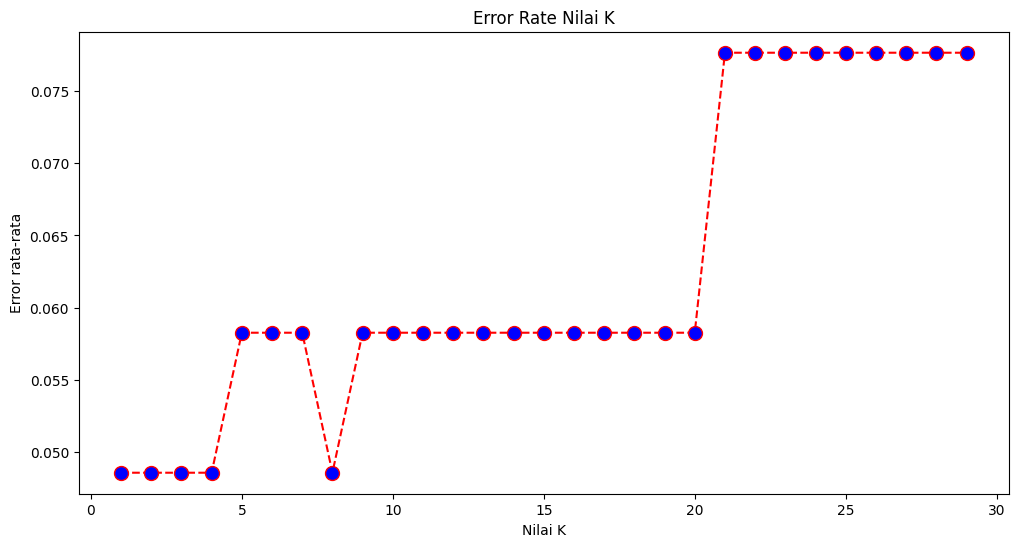

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error rata-rata')
plt.savefig(r"ErrorRate_KNN.png")